In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
X_train = pd.read_csv('Samsung_HAR/samsung_HAR/samsung_train.txt', delimiter=' ', header=None)
y_train = pd.read_csv('Samsung_HAR/samsung_HAR/samsung_train_labels.txt', header=None)
X_test = pd.read_csv('Samsung_HAR/samsung_HAR/samsung_test.txt', delimiter=' ', header=None)
y_test = pd.read_csv('Samsung_HAR/samsung_HAR/samsung_test_labels.txt', header=None)

# Połączenie danych treningowych i testowych
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

print("Kształt danych:", X.shape)
print("Kształt etykiet:", y.shape)


In [ ]:
# 1. K-means
def perform_kmeans(X, n_clusters=6, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(X)
    return clusters, kmeans

# 2. DBSCAN
def perform_dbscan(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters, dbscan

# 3. Gaussian Mixture Model (GMM)
def perform_gmm(X, n_components=6, random_state=42):
    gmm = GaussianMixture(n_components=n_components, random_state=random_state)
    clusters = gmm.fit_predict(X)
    return clusters, gmm

# Funkcja do oceny jakości klastrów
def evaluate_clustering(X, clusters, true_labels):
    if len(np.unique(clusters)) <= 1:
        return {
            'ari_score': 0,
            'silhouette': 0
        }
    
    return {
        'ari_score': adjusted_rand_score(true_labels, clusters),
        'silhouette': silhouette_score(X, clusters)
    }

# Wykonanie clusteringu różnymi metodami
kmeans_clusters, kmeans_model = perform_kmeans(X)
dbscan_clusters, dbscan_model = perform_dbscan(X)
gmm_clusters, gmm_model = perform_gmm(X)

# Ocena wyników
print("K-means wyniki:", evaluate_clustering(X, kmeans_clusters, y.values.ravel()))
print("DBSCAN wyniki:", evaluate_clustering(X, dbscan_clusters, y.values.ravel()))
print("GMM wyniki:", evaluate_clustering(X, gmm_clusters, y.values.ravel()))


In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y, iris_classes = iris.data, iris.target, iris.target_names

In [2]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)


In [3]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()

models = []
scores =[]

for fold_nr, (train_idx, test_idx) in enumerate(kf.split(X)):
  X_train = X[train_idx]
  X_test = X[test_idx]

  y_train = y[train_idx]
  y_test = y[test_idx]

  # skalowanie danych
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # model
  model = SGDClassifier(random_state=1).fit(X_train, y_train)

  models.append(model)
  scores.append(model.score(X_test, y_test))

print('Wyniki poszczególnych foldów: ', scores)
print('Średni wynik poszczególnych foldów: ', np.array(scores).mean())

Wyniki poszczególnych foldów:  [0.8666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333]
Średni wynik poszczególnych foldów:  0.9199999999999999


In [4]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# stworzenie klasyfikatora
clf = SGDClassifier(random_state=1)

# użycie metody cross_val_score do sprawdzenia
# działania naszego modelu na różnych podziałach
cv_score = cross_val_score(clf, X, y, cv=5)
print("wynik kroswalidacji: ", cv_score)
print("średni wynik wszystkich foldów: ", cv_score.mean())

wynik kroswalidacji:  [0.83333333 0.93333333 0.8        0.7        0.9       ]
średni wynik wszystkich foldów:  0.8333333333333334


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.99, 0.01],
    flip_y=0,
    random_state=1
)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state=3)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=790, 1=10, Test: 0=200, 1=0


In [6]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state=3, stratify=y)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


In [7]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [8]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()

models = []
scores =[]

for fold_nr, (train_idx, test_idx) in enumerate(kf.split(X, y)):
  X_train = X[train_idx]
  X_test = X[test_idx]

  y_train = y[train_idx]
  y_test = y[test_idx]

  # skalowanie danych
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # model
  model = SGDClassifier(random_state=1).fit(X_train, y_train)

  models.append(model)
  scores.append(model.score(X_test, y_test))

print('Wyniki poszczególnych foldów: ', scores)
print('Średni wynik poszczególnych foldów: ', np.array(scores).mean())

Wyniki poszczególnych foldów:  [0.995, 0.985, 0.975, 0.965, 0.99]
Średni wynik poszczególnych foldów:  0.982


In [9]:
import numpy as np

from sklearn.datasets import make_blobs

# środki naszych klastrów

centroids = np.array([
    [ 0.8, 2.0],
    [-0.5, 2.0],
    [-2.0, 2.0],
    [-2.5, 2.5],
    [-2.5, 1.0]
])

# wprowadzenie szumu do naszych klastrów, aby rozrzucić próbki
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# stworzenie zbioru danych
X, y = make_blobs(
    n_samples=3000,
    centers=centroids,
    cluster_std=blob_std,
    random_state=7
)

In [10]:
import matplotlib.pyplot as plt
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

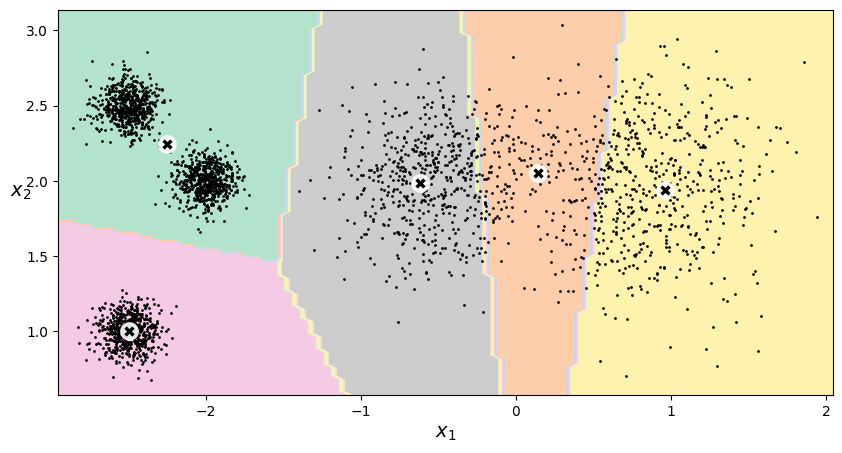

In [11]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)

# możemy uzyć metod fit(), predict() 
clf.fit(X)
y_pred = clf.predict(X)

#albo metody fit)predict, która łączy dwie powyższe

# y_pred = clf.fit_predict(X)

plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

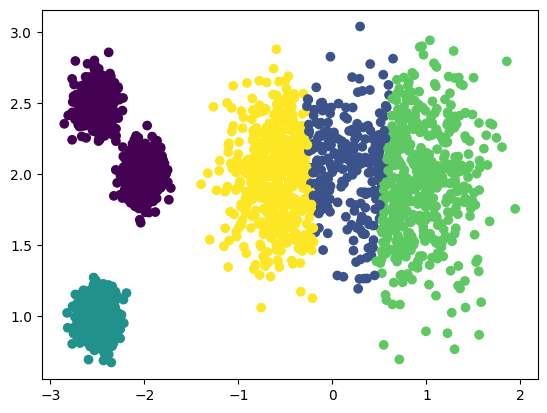

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [13]:
%timeit
centroids = np.array([
    [ 0.8, 2.0],
    [-0.5, 2.0],
    [-2.0, 2.0],
    [-2.5, 2.5],
    [-2.5, 1.0]
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 3 miliony punktów!!!
X, y = make_blobs(
    n_samples=30000,
    centers=centroids,
    cluster_std=blob_std,
    random_state=7
)

In [14]:
from sklearn.cluster import MiniBatchKMeans

%timeit

# metoda MiniBatchKMeans
MBKMeans_clf = MiniBatchKMeans(n_clusters=5, max_iter=10, random_state=1)
MBKMeans_clf.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,10
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,1
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [15]:
from sklearn.cluster import KMeans

%timeit

# metoda KMeans
KMeans_clf = KMeans(n_clusters=5, max_iter=10, random_state=1)
KMeans_clf.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,10
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [16]:
# tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(X)
    for k in range(2, 10) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra
]

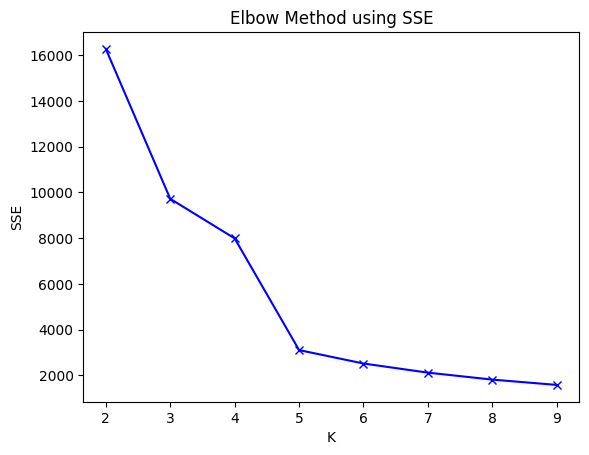

In [17]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 10), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans_per_k[0].labels_, n_jobs=-1)

0.6471282096698382

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kmeans_per_k
]

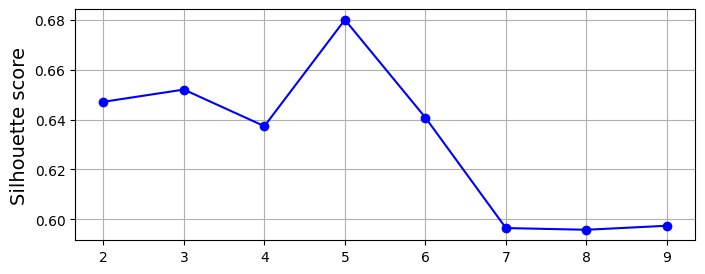

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold

digits = load_digits()

X, y = digits.data, digits.target

kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X):
    print(f"Train: {len(train_index)}, Test: {len(test_index)}")

Train: 1437, Test: 360
Train: 1437, Test: 360
Train: 1438, Test: 359
Train: 1438, Test: 359
Train: 1438, Test: 359


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('kmeans', KMeans(n_clusters=40, random_state=1)),
    ('log_reg', LogisticRegression(multi_class='ovr', random_state=1))
])

pipe.fit(X, y)

pipe.score(X, y)


c:\Projekty\kodilla\modul_16\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Projekty\kodilla\modul_16\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Projekty\kodilla\modul_16\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: Con

0.989983305509182

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    train_test_split(X_digits, y_digits, random_state=2)

log_reg = LogisticRegression( max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        n_init=4,
        random_state=2
    )),
    ("log_reg", LogisticRegression(
        max_iter=5000,
        random_state=2
    )),
])
pipeline.fit(X_train, y_train)

print("Z KMeans :", pipeline.score(X_test, y_test))

Bez KMeans : 0.9444444444444444
Z KMeans : 0.96


In [36]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

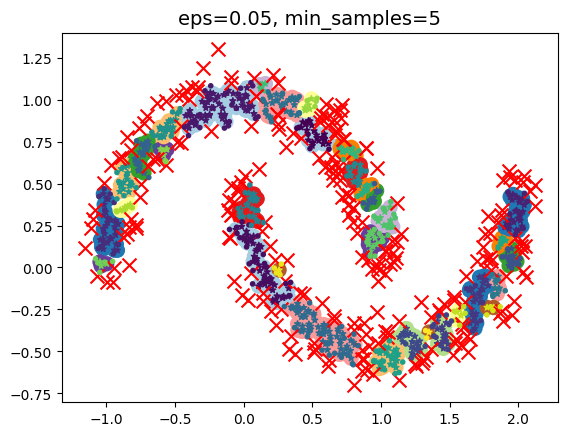

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# tworzymy zbiór moon
X, y = make_moons(n_samples=1000, noise=0.08)

# tworzymy pierwszy klasyfikator DBSCAN z eps = 0.05
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# drugi DBSCAN z eps = 0.2 (większy epsilon, większa przestrzeń wokół)
dbscan_2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_2.fit(X)

plot_dbscan(dbscan, X, size=100)

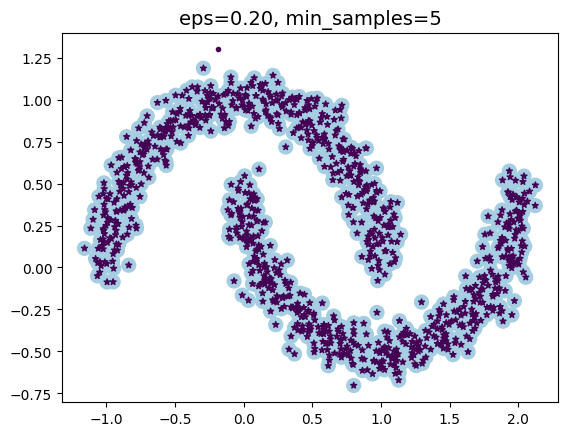

In [40]:

plot_dbscan(dbscan_2, X, size=100)

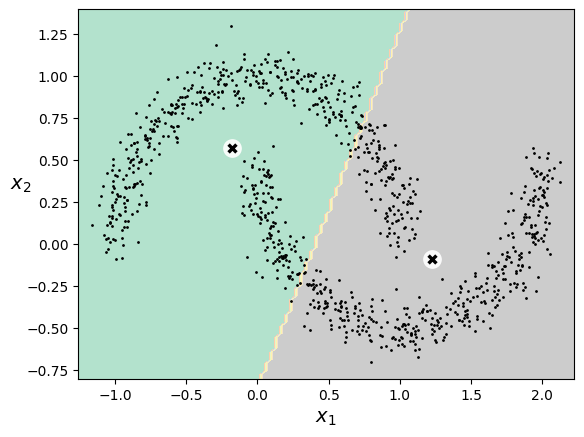

In [41]:
KMeans_clf = KMeans(n_clusters=2, max_iter=100000)
KMeans_clf.fit(X)

plot_decision_boundaries(KMeans_clf, X)

In [42]:
from sklearn.datasets import make_blobs
import numpy as np

# tworzymy "bloby", czyli grupy danych
X1, y1 = make_blobs(n_samples=800, centers=((2, -2), (-2, 2)), random_state=2)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=200, centers=1, random_state=42)
X2 = X2 + [6, -8]

# przydatna metoda NumPy r_ - służy do składania dwóch tablic wg wybranej osi
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [44]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

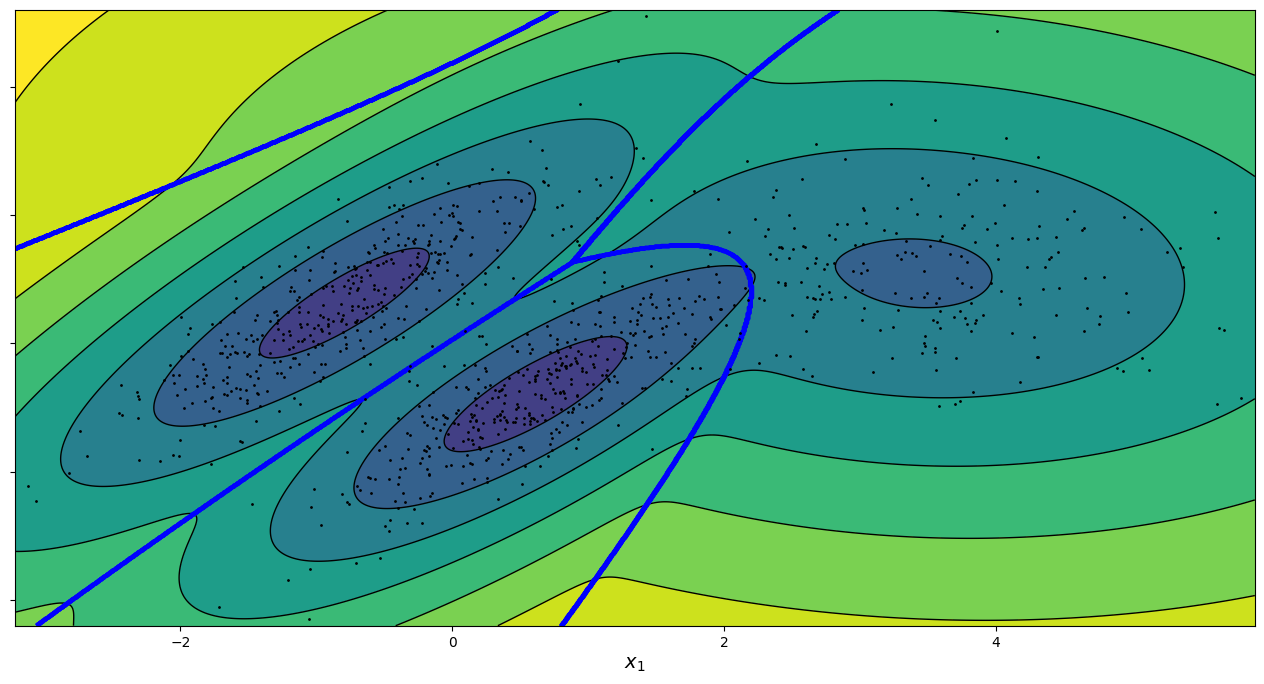

In [54]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

In [56]:
# Pobieramy wartości dla naszego zbioru, które
# mówią nam, jak bardzo element należy do klastrów
density = gm.score_samples(X)

# Tworzymy wartość graniczną, czyli threshold. Wartości,
# które mają wyniki z poprzedniej linii mniejsze od naszego
# threshold, są anomaliami, więc zostają odsiane

# W naszym przypadku chcemy odsiać 5% najgorszych wartości
threshold = np.percentile(density, 5)

# Odsiewamy te wartości poprzez proste porównanie
anomalie = X[density < threshold]